In [47]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from main import simulate
from src.mpc import Controller, Dimension
import src.terminal_set as terminal_set


if __name__ == "__main__":
    dt = 0.10  # Sampling period
    N = 20  # MPC Horizon
    T = 100  # Duration of simulation

    dim = Dimension(nx=12, nu=4, ny=3, nd=3)

    x_init = np.zeros(dim.nx)  # Initial conditions
    y_target = np.zeros(dim.ny)  # State to reach
    y_target[0:3] = np.array([1.0, 1.0, 1.0])

    Controller
    ctrl1 = Controller(
        dim=dim,
        mpc_horizon=15,
        timestep_mpc_stages=dt,
    )
    ctrl2 = Controller(
        dim=dim,
        mpc_horizon=20,
        timestep_mpc_stages=dt,
    )
    ctrl3 = Controller(
        dim=dim,
        mpc_horizon=30,
        timestep_mpc_stages=dt,
    )
    ctrl4 = Controller(
        dim=dim,
        mpc_horizon=40,
        timestep_mpc_stages=dt,
    )
    ctrl5 = Controller(
        dim=dim,
        mpc_horizon=50,
        timestep_mpc_stages=dt,
    )
    # ctrl6 = Controller(
    #     dim=dim,
    #     mpc_horizon=40,
    #     timestep_mpc_stages=dt,
    # )
    ctrl1.beta = 1.0
    ctrl2.beta = 1.0
    ctrl3.beta = 1.0
    ctrl4.beta = 1.0
    ctrl5.beta = 1.0

    # (x_target1, _) = ctrl1.computeOTS(y_target, np.zeros(ctrl1.dim.nd))
    # (x_target2, _) = ctrl2.computeOTS(y_target, np.zeros(ctrl2.dim.nd))
    # (x_target3, _) = ctrl3.computeOTS(y_target, np.zeros(ctrl3.dim.nd))
    # (x_target4, _) = ctrl4.computeOTS(y_target, np.zeros(ctrl4.dim.nd))
    # (x_target5, _) = ctrl5.computeOTS(y_target, np.zeros(ctrl5.dim.nd))

    # ctrl1.c_level = terminal_set.calculate_c(ctrl1, x_target1)
    # ctrl2.c_level = ctrl1.c_level
    # ctrl3.c_level = ctrl1.c_level
    # ctrl4.c_level = ctrl1.c_level
    # ctrl5.c_level = ctrl1.c_level

    # ctrl2.c_level = terminal_set.calculate_c(ctrl2, x_target2)
    # ctrl3.c_level = terminal_set.calculate_c(ctrl3, x_target3)

    # ctrl4.c_level = terminal_set.calculate_c(ctrl4, x_target4)
    # ctrl5.c_level = terminal_set.calculate_c(ctrl5, x_target5)
    # ctrl6.c_level = terminal_set.calculate_c(ctrl6, x_target1)

    states1, _, _, _, _, _, _, time_cost1 = simulate(
        controller=ctrl1, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states2, _, _, _, _, _, _, time_cost2 = simulate(
        controller=ctrl2, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states3, _, _, _, _, _, _, time_cost3 = simulate(
        controller=ctrl3, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states4, _, _, _, _, _, _, time_cost4 = simulate(
        controller=ctrl4, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states5, _, _, _, _, _, _, time_cost5 = simulate(
        controller=ctrl5, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    # states6, _, _, _, _, _, _, time_cost6 = simulate(
    #     controller=ctrl6, x_init=x_init, y_target=y_target, T=T
    # )
    ###################################### Plot position error

    

Simulating: 100%|██████████| 100/100 [00:05<00:00, 16.88it/s]


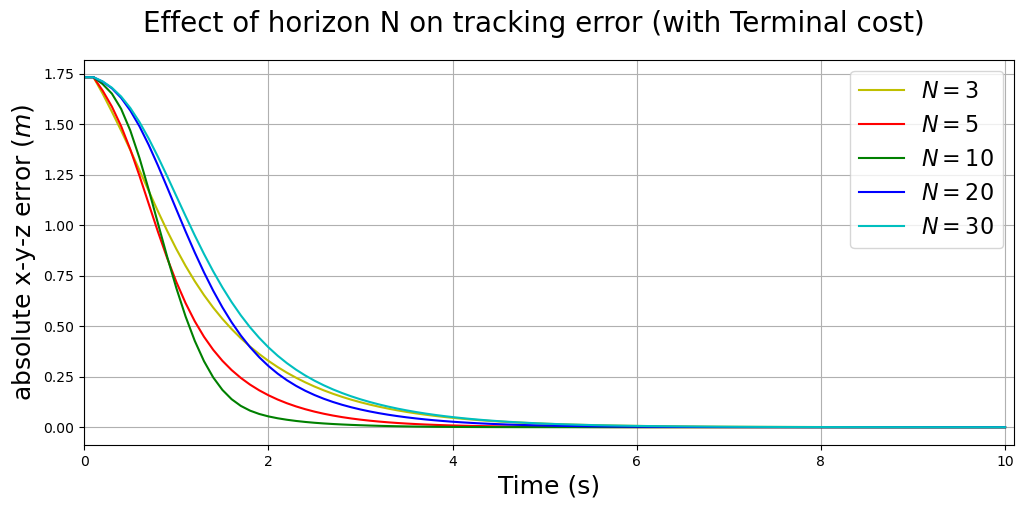

In [31]:
fN = plt.figure(figsize=(12, 5))

# As Cd is identity matrix, here we can use target output to represent target state
def error(states):
    # Euclidean error on x, y, z
    error = np.sqrt(
        np.square(y_target[0] - states[0, :])
        + np.square(y_target[1] - states[1, :])
        + np.square(y_target[2] - states[2, :])
    )
    return error

t = np.arange(0, 10.1, 0.1)

plt.plot(t, error(states1), color="y", label=r"$N = 3$")
plt.plot(t, error(states2), color="r", label=r"$N = 5$")
plt.plot(t, error(states3), color="g", label=r"$N = 10$")
plt.plot(t, error(states4), color="b", label=r"$N = 20$")
plt.plot(t, error(states5), color="c", label=r"$N = 30$")

plt.legend(fontsize=16, loc='upper right')
plt.xlim([0, 10.1])
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"absolute x-y-z error $(m)$", fontsize=18)
plt.suptitle(
    "Effect of horizon N on tracking error (with Terminal cost)", fontsize=20
)
plt.grid()
plt.show()

In [46]:
t_cost_t_set = np.array([time_cost1, time_cost2, time_cost3, time_cost4, time_cost5])

In [48]:
t_cost_scaling_beta = np.array([time_cost1, time_cost2, time_cost3, time_cost4, time_cost5])

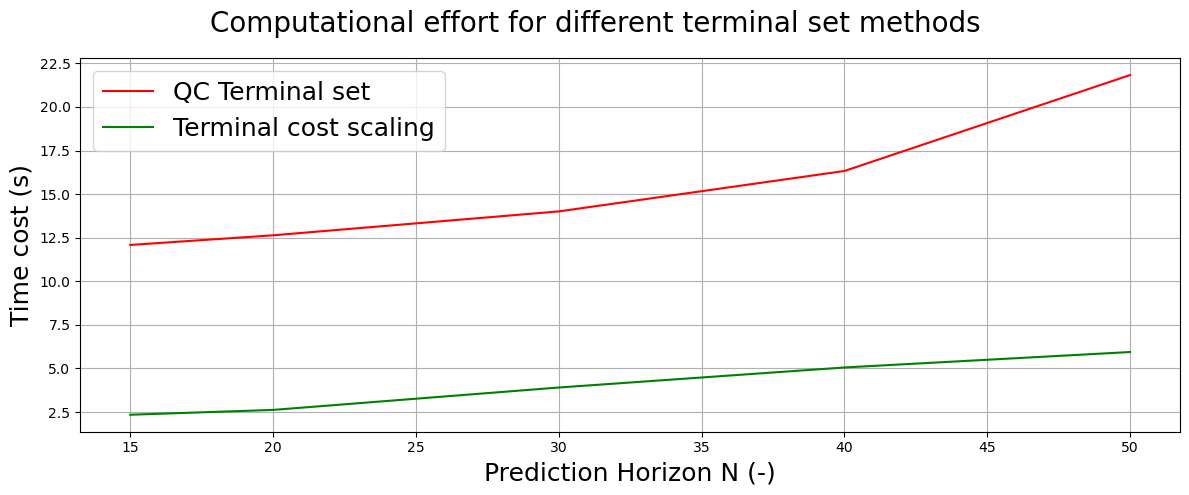

In [63]:
N = np.array([ctrl1.N, ctrl2.N, ctrl3.N, ctrl4.N, ctrl5.N])
t= np.array([time_cost1, time_cost2, time_cost3, time_cost4, time_cost5])
# plt.xlim([0, 38])
# plt.ylim([0, 10])
fig = plt.figure(figsize=(12,5))
plt.plot(N, t_cost_t_set, color='r', label='QC Terminal set')
plt.plot(N, t_cost_scaling_beta, color='g', label='Terminal cost scaling')
plt.xlabel("Prediction Horizon N (-)", fontsize=18)
plt.ylabel("Time cost (s)", fontsize=18)
plt.suptitle("Computational effort for different terminal set methods", fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18)
plt.grid()
plt.show()